Thasina Tabashum

In [70]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as py

%matplotlib inline

In [71]:
print(tf.__version__)

2.1.0


In [72]:
from sklearn.datasets import load_digits
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [78]:
print(train_images.shape)
print(train_labels.shape)
print(len(train_images))

(60000, 28, 28)
(60000,)
60000


In [94]:
print(test_images.shape)
print(test_labels.shape)
print(len(test_images))

(10000, 28, 28)
(10000,)
10000


In [95]:
test_images2 = test_images.reshape(len(test_images),-1)

In [79]:
train_images2 = train_images.reshape(len(train_images),-1)

In [80]:
print(train_images2.shape)

(60000, 784)


In [81]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

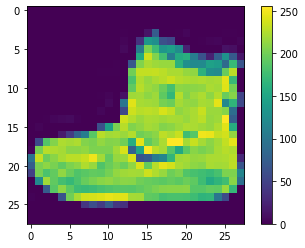

In [82]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [83]:
train_images2 = train_images2 / 255.0

test_images = test_images / 255.0

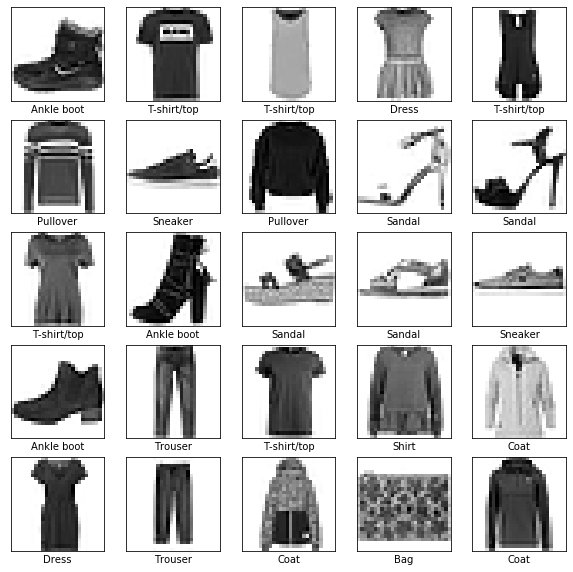

In [84]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

(60000, 5)


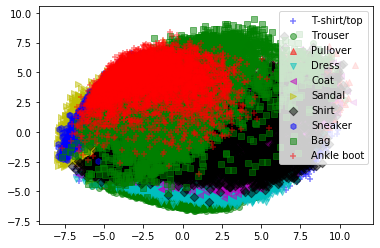

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(train_images2)

X_pca.shape

from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(train_labels), cycle(colors), cycle(markers)):
    py.scatter(X_pca[train_labels == i, 0], X_pca[train_labels == i, 1],
        c=c, marker=m, label=class_names[i], alpha=0.5)

_ = py.legend(loc='best')
print(X_pca.shape)

In [87]:
def plot_gallery(data, labels, shape, interpolation='nearest'):
    for i in range(data.shape[0]):
        py.subplot(1, data.shape[0], (i + 1))
        py.imshow(data[i].reshape(shape), interpolation=interpolation)
        py.title(labels[i])
        py.xticks(()), py.yticks(())
        py.gray()

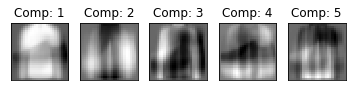

In [89]:
labels = ['Comp: %d' % (i+1) for i in range(len(pca.components_)) ]
plot_gallery(pca.components_, labels, shape=(28,28))

compressed images of first 8 digits
with this many PCA components: [1, 2, 3, 5, 10, 20, 40, 64]


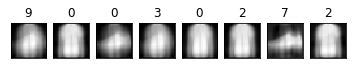

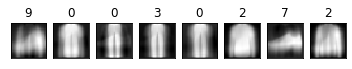

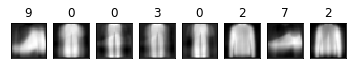

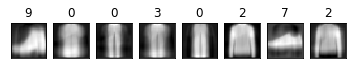

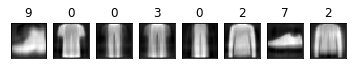

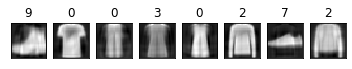

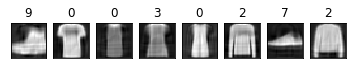

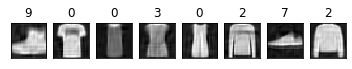

In [93]:
n = 8 # number of digits for demonstration
dims = [1,2,3,5,10,20,40,64]
print('compressed images of first',n,'digits')
print('with this many PCA components:',dims)
for d in dims:  # dimensionality for compressed signal
    pca = PCA(n_components=d)
    pca.fit_transform(train_images2)
    reduced_X = pca.transform(train_images2[0:n]) # the reduced dimensionality
    recovered_X = pca.inverse_transform(reduced_X)
    py.figure()
    plot_gallery(recovered_X, train_labels[0:n], shape=(28, 28))

In [96]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(train_images2, train_labels)
train_score = model.score(train_images2, train_labels) 
print('training score (overfitting!):',train_score)

test_score = model.score(test_images2, test_labels)
print('test score:',test_score)

training score (overfitting!): 0.5877833333333333
test score: 0.5856


In [100]:
pca = PCA(n_components=10)
pca.fit(train_images2)

tX_train = pca.transform(train_images2)
tX_test = pca.transform(test_images2)

model = GaussianNB().fit(tX_train, train_labels)
train_score = model.score(tX_train, train_labels) 
print('training score (overfitting!):',train_score)

test_score = model.score(tX_test, test_labels)
print('test score:',test_score)

from sklearn import metrics
y_test_pred = model.predict(tX_test)
expected = test_labels
predicted = model.predict(tX_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

training score (overfitting!): 0.7060833333333333
test score: 0.7003
Confusion matrix:
[[763   0  16  75  12  44  61   0  29   0]
 [ 27 882  15  52   7   6   2   0   9   0]
 [ 10   0 514   7 226  38 175   0  30   0]
 [ 79   7   4 761  45  27  72   0   5   0]
 [  1   3 257  42 569  22  93   0  13   0]
 [  0   0   0   2   0 692   1 205  24  76]
 [236   0 180  37 165  76 256   0  50   0]
 [  0   0   0   0   0  97   0 813   3  87]
 [  6   1  13   8  14  53  33  18 852   2]
 [  0   0   0   0   0  49   2  45   3 901]]


Text(0, 0.5, 'digit recognition accuracy')

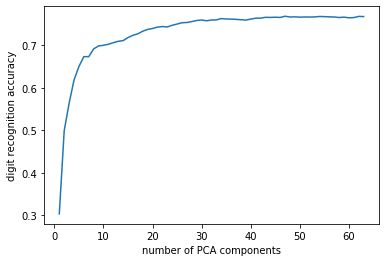

In [101]:
accuracy = []
n_comp = range(1,64)
for i in n_comp:
    pca = PCA(n_components=i)
    pca.fit(train_images2)

    tX_train = pca.transform(train_images2)
    tX_test = pca.transform(test_images2)

    model = GaussianNB().fit(tX_train, train_labels)
    test_score = model.score(tX_test, test_labels)
    accuracy.append(test_score)

py.plot(n_comp, accuracy)
py.xlabel('number of PCA components')
py.ylabel('digit recognition accuracy')

In [103]:
import matplotlib.pyplot as plt
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

final = [[""]*4 for i in range(3)]
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
n_samples = len(train_images)
expected = train_labels
data = train_images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(data, expected, test_size=0.40)

In [107]:
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':[2,5]}
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv=5)
default_train=np.mean(scores)

clf=GridSearchCV(knn, parameters, cv=5,scoring="accuracy",iid=False)
clf.fit(X_train,y_train)
best_train=clf.best_score_
nn=clf.best_estimator_.n_neighbors

y_pred = clf.predict(X_test) # runs the model with the best score
best_test=metrics.accuracy_score(y_test,y_pred)

final[0][0]=str(default_train)
final[0][1]=str(best_train)
final[0][2]="n_neighbors: "+str(nn)
final[0][3]=str(best_test)

In [108]:
from sklearn import tree
DT=tree.DecisionTreeClassifier()
scores=cross_val_score(DT, X_train, y_train, cv=5)
default_train=np.mean(scores)

parameters={'min_samples_split':list(range(2,10))}
clf=GridSearchCV(DT, parameters, cv=5,scoring="accuracy",iid=False)
clf.fit(X_train,y_train)
best_train=clf.best_score_
min_samples=clf.best_estimator_.min_samples_split

y_pred = clf.predict(X_test) # runs the model with the best score
best_test=metrics.accuracy_score(y_test,y_pred)

final[1][0]=str(default_train)
final[1][1]=str(best_train)
final[1][2]="min_samples: "+str(min_samples)
final[1][3]=str(best_test)

In [109]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression(penalty='l1', solver='saga', tol=0.01)
scores=cross_val_score(regression, X_train, y_train, cv=5)
default_train=np.mean(scores)

parameters={'C':[10**(i-4) for i in range(9)]}
clf=GridSearchCV(regression, parameters, cv=5,scoring="accuracy",iid=False)
clf.fit(X_train,y_train)
best_train=clf.best_score_
C=clf.best_estimator_.C

y_pred = clf.predict(X_test) # runs the model with the best score
best_test=metrics.accuracy_score(y_test,y_pred)

final[2][0]=str(default_train)
final[2][1]=str(best_train)
final[2][2]="C: "+str(C)
final[2][3]=str(best_test)

In [110]:
left=["K-nearest neighbors: ","Decision Trees:      ","Logistic Regression: "]
print("Model                "," Default Accuracy","Tuned Valid. Acc.",
 " Hyperparameters ","  Test Set Acc. ",sep="|",end="|\n")
for i in range(50):
 print("_",end="_")
print("")
for i in range(3):
 print(left[i],end="|")
 for j in range(4):
   print('{:>17.15}'.format(final[i][j]),end="|")
 print("")

Model                | Default Accuracy|Tuned Valid. Acc.| Hyperparameters |  Test Set Acc. |
____________________________________________________________________________________________________
K-nearest neighbors: |  0.8450288399279|  0.8450288399279|   n_neighbors: 5|  0.8509583333333|
Decision Trees:      |  0.7829170194727|  0.7844444731603|   min_samples: 9|           0.7865|
Logistic Regression: |  0.8455008694235|  0.8456952599081|             C: 1|         0.850375|
